In [1]:
import math
import torch
import gpytorch
from matplotlib import pyplot as plt
from kernels import *
import pdb
import gpytorch
from itertools import product

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
train_x = torch.linspace(float(0), float(1), int(50))
one = torch.sin(train_x * (float(2) * math.pi)) + torch.randn(train_x.size()) * float(0.2)
two = torch.cos(train_x * (float(2) * math.pi)) + torch.randn(train_x.size()) * float(0.2)
train_y = torch.stack([one, two], int(-1))


In [3]:
class MultitaskGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MultitaskGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(
            gpytorch.means.ZeroMean(), num_tasks=2
        )
        
        kernel0 = Diff_SE_kernel()
        kernel1 = Diff_SE_kernel()
        kernel2 = Diff_SE_kernel()
        self.covar_module = MatrixKernel([[kernel0, None], [None, kernel2]])

    def forward(self, x):
        #pdb.set_trace()
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        #print(f"{covar_x.detach().evaluate()}")
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x, validate_args=True)


likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=2)
model = MultitaskGPModel(train_x, train_y, likelihood)

In [4]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = int(2) if smoke_test else int(20)


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=float(0.1))  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    #print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f  variance: %.3f noise: %.3f' % (
    #    i + 1, training_iter, loss.item(),
    #    model.covar_module.length.item(),
    #    model.covar_module.var.item(),
    #    model.likelihood.noise.item()
    #))
    optimizer.step()

> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
--> 557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:
    558                         temp = torch.hstack([temp, result1])
    559                     else:

ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[1.0001, 0.9998, 0.9992,  ..., 0.0000, 0.0000, 0.0000],
        [0.9998, 1.0001, 0.9998,  ..., 0.0000, 0.0000, 0.0000],
        [0.9992, 0.9998, 1.0001,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 

ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[0.7009, 0.7005, 0.6996,  ..., 0.0000, 0.0000, 0.0000],
        [0.7005, 0.7009, 0.7005,  ..., 0.0000, 0.0000, 0.0000],
        [0.6996, 0.7005, 0.7009,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.9531, 0.9526, 0.9514],
        [0.0000, 0.0000, 0.0000,  ..., 0.9526, 0.9531, 0.9526],
        [0.0000, 0.0000, 0.0000,  ..., 0.9514, 0.9526, 0.9531]],
       grad_fn=<CatBackward>)
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])

ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[0.4855, 0.4844, 0.4815,  ..., 0.0000, 0.0000, 0.0000],
        [0.4844, 0.4855, 0.4844,  ..., 0.0000, 0.0000, 0.0000],
        [0.4815, 0.4844, 0.4855,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.2865, 1.2840, 1.2768],
        [0.0000, 0.0000, 0.0000,  ..., 1.2840, 1.2865, 1.2840],
        [0.0000, 0.0000, 0.0000,  ..., 1.2768, 1.2840, 1.2865]],
       grad_fn=<CatBackward>)
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])

> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
--> 557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:
    558                         temp = torch.hstack([temp, result1])
    559                     else:

ipdb> 
ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[0.4607, 0.4564, 0.4442,  ..., 0.0000, 0.0000, 0.0000],
        [0.4564, 0.4607, 0.4564,  ..., 0.0000, 0.0000, 0.0000],
        [0.4442, 0.4564, 0.4607,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0

ipdb> 
ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[0.2977, 0.2967, 0.2938,  ..., 0.0000, 0.0000, 0.0000],
        [0.2967, 0.2977, 0.2967,  ..., 0.0000, 0.0000, 0.0000],
        [0.2938, 0.2967, 0.2977,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.4097, 1.4060, 1.3953],
        [0.0000, 0.0000, 0.0000,  ..., 1.4060, 1.4097, 1.4060],
        [0.0000, 0.0000, 0.0000,  ..., 1.3953, 1.4060, 1.4097]],
       grad_fn=<CatBackward>)
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, re

> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
--> 557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:
    558                         temp = torch.hstack([temp, result1])
    559                     else:

ipdb> 
ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[0.4461, 0.4433, 0.4354,  ..., 0.0000, 0.0000, 0.0000],
        [0.4433, 0.4461, 0.4433,  ..., 0.0000, 0.0000, 0.0000],
        [0.4354, 0.4433, 0.4461,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0

In [5]:
for p in model.named_parameters():
    print(p)

('likelihood.raw_task_noises', Parameter containing:
tensor([-2.0437, -2.0572], requires_grad=True))
('likelihood.raw_noise', Parameter containing:
tensor([-2.0521], requires_grad=True))
('covar_module.kernel_00.var', Parameter containing:
tensor(0.5050, requires_grad=True))
('covar_module.kernel_00.length', Parameter containing:
tensor(0.1770, requires_grad=True))
('covar_module.kernel_11.var', Parameter containing:
tensor(1.3532, requires_grad=True))
('covar_module.kernel_11.length', Parameter containing:
tensor(0.3406, requires_grad=True))


In [6]:
tuple([1,2])

(1, 2)

In [7]:
# Set into eval mode
model.eval()
likelihood.eval()

# Initialize plots

number_of_samples = int(50)
# Make predictions
with torch.no_grad():#, gpytorch.settings.fast_pred_var():
    test_x = torch.linspace(float(0), float(2), number_of_samples)
    #pdb.set_trace()
    outputs = model(test_x)
    predictions = likelihood(outputs)
    
    mean = predictions.mean
    lower, upper = predictions.confidence_region()
#print(mean)
#print(lower)
#print(upper)
# This contains predictions for both tasks, flattened out
# The first half of the predictions is for the first task
# The second half is for the second task

#dims = int(2)
#indices = [list(range(i, len(train_y), dims)) for i in range(dims)]


> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(557)forward()
    555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
--> 557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:
    558                         temp = torch.hstack([temp, result1])
    559                     else:

ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(555)forward()
    553                 else:
    554                     import pdb
--> 555                     pdb.set_trace()
    556                     #temp = CatLazyTensor(*[temp, result1])
    557                     if type(temp) == torch.Tensor and type(result1) == torch.Tensor:

ipdb> c
tensor([[0.5051, 0.5017, 0.4918,  ..., 0.0000, 0.0000, 0.0000],
        [0.5017, 0.5051, 0.5017,  ..., 0.0000, 0.0000, 0.0000],
        [0.4918, 0.5017, 0.5051,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 

Text(0.5, 1.0, 'Observed Values (Likelihood)')

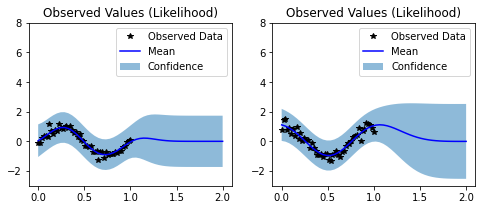

In [8]:
f, (y1_ax, y2_ax) = plt.subplots(int(1), int(2), figsize=(int(8), int(3)))

# Plot training data as black stars
y1_ax.plot(train_x.detach().numpy(), train_y[:, 0].detach().numpy(), 'k*')
# Predictive mean as blue line
y1_ax.plot(test_x.numpy(), mean[:, 0].numpy(), 'b')
# Shade in confidence
y1_ax.fill_between(test_x.numpy(), lower[:, 0].numpy(), upper[:, 0].numpy(), alpha=0.5)
y1_ax.set_ylim([-3, 8])
y1_ax.legend(['Observed Data', 'Mean', 'Confidence'])
y1_ax.set_title('Observed Values (Likelihood)')

# Plot training data as black stars
y2_ax.plot(train_x.detach().numpy(), train_y[:, 1].detach().numpy(), 'k*')
# Predictive mean as blue line
y2_ax.plot(test_x.numpy(), mean[:, 1].numpy(), 'b')
# Shade in confidence
y2_ax.fill_between(test_x.numpy(), lower[:, 1].numpy(), upper[:, 1].numpy(), alpha=0.5)
y2_ax.set_ylim([-3, 8])
y2_ax.legend(['Observed Data', 'Mean', 'Confidence'])
y2_ax.set_title('Observed Values (Likelihood)')


# Test Diffable SE Kernel

In [9]:
X = torch.tensor([int(1), int(2), int(3)])
X

tensor([1, 2, 3])

In [10]:
x1, x2, l, sigma = var('x1, x2, l, sigma')
lengthscale = 1
variance = 1
SE(x1, x2, l, sigma) = sigma^2*exp(-(x1-x2)^2/(2*l^2))
cov_matr = [[None for i in range(len(X))] for j in range(len(X))]
for i, (v1, v2) in enumerate(product(X, X)):
    cov_matr[int(i/len(X))][int(i%len(X))] = SE.diff(x2).diff(x1)(int(v1), int(v2), lengthscale, variance)
cov_matr

[[1, 0, -3*e^(-2)], [0, 1, 0], [-3*e^(-2), 0, 1]]

In [11]:
SE.operands()

[sigma^2, e^(-1/2*(x1 - x2)^2/l^2)]

In [12]:
a = Diff_SE_kernel(var=int(variance), length=int(lengthscale))
q, dx1, dx2 = var('q, dx1, dx2')
left_poly = dx2
right_poly = dx1
diffed_kernel = a.diff(left_poly=left_poly, right_poly=right_poly, left_d_var=var('dx2'), right_d_var=var('dx1'))
diffed_kernel(X).evaluate()

tensor([[ 0.0000, -0.6065, -0.2707],
        [ 0.6065,  0.0000, -0.6065],
        [ 0.2707,  0.6065,  0.0000]], grad_fn=<MulBackward0>)

In [13]:
def calc_cell_diff(L, M, R, row, col):
    len_M = M.number_of_arguments()
    temp = None
    for j in range(int(sqrt(len_M))):
        if temp == None:
            import itertools
            #M_tr = list(map(list, itertools.zip_longest(*M, fillvalue=None)))
            #[M_tr[j].diff(left_poly=L[row][k], right_poly=R.transpose()[col][j]) for k in range(L.number_of_arguments())]
            temp = L[row]*M.transpose()[j]*R.transpose()[col][j]
        else:
            temp += L[row]*M.transpose()[j]*R.transpose()[col][j]
    return temp

In [ ]:
dimension = 2
length = dimension*dimension +1
L_list = [var(f'l_{i}{j}') for i in range(1, dimension+1) for j in range(1, dimension+1)]
M_list = [var(f'm_{i}{j}') for i in range(1, dimension+1) for j in range(1, dimension+1)]
R_list = [var(f'r_{i}{j}') for i in range(1, dimension+1) for j in range(1, dimension+1)]
L = matrix(dimension, dimension, L_list)
M = matrix(dimension, dimension, M_list)
R = matrix(dimension, dimension, R_list)
print(L)
print(M)
print(R)
row = 1
col = 1
print((L*M*R)[row][col])

calc_cell_diff(L, M, R, row, col)

In [15]:
l = [[1, 2, 3], [2, 3, 4], [4, 5, 6]]
for i, k in enumerate(l):
    print(k)


[1, 2, 3]
[2, 3, 4]
[4, 5, 6]


In [16]:
MSE(x1, x2, sigma, l) = matrix(2,2, (sigma^2*exp(-(x1-x2)^2/(2*l^2)), 0, 0, sigma^2*exp(-(x1-x2)^2/(2*l^2))))
dx1 = matrix(2,2,(dx1, 0, 0, dx1))
MSE

(x1, x2, sigma, l) |--> [sigma^2*e^(-1/2*(x1 - x2)^2/l^2)                                0]
[                               0 sigma^2*e^(-1/2*(x1 - x2)^2/l^2)]

In [17]:
kernel = Diff_SE_kernel()
kernel2 = Diff_SE_kernel()

p = DiffMatrixKernel([[kernel, None], [None, kernel2]])

In [36]:
q, dx1, dx2 = var('q, dx1, dx2')
left_poly = dx1
right_poly = dx2
L = matrix(2, 2, (dx1, 1, 1, dx1))
R = matrix(2, 2, (dx2, 1, 1, dx2))

In [49]:
p.diff(left_matrix=L, right_matrix=R).forward(X, X)

> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(635)diff()
    631                         int(i % np.shape(self.matrix)[0])]  = res
    632 
    633         import pdb
    634         pdb.set_trace()
--> 635         return MatrixKernel(output_matrix)

ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(558)forward()
    556                         import pdb
    557                         pdb.set_trace()
--> 558                         a = temp.evaluate()
    559                         b = result1.evaluate()
    560                         temp = torch.hstack([a, b])

ipdb> c
> /Users/andreas/Documents/container_storage/sage/DiffEqGPs/kernels.py(393)forward()
    391                     import pdb
    392                     pdb.set_trace()
--> 393                     degr_o = term['d^o']
    394                     degr_p = term['d^p']
    395                     poly_coeffs = term['coeff']

ipdb> c
> /Users/andreas/Documents/contai

tensor([[ 2.0000,  2.0000,  0.6065,  0.6065, -0.2707, -0.2707],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.6065,  0.6065,  2.0000,  2.0000,  0.6065,  0.6065],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.2707, -0.2707,  0.6065,  0.6065,  2.0000,  2.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       grad_fn=<CatBackward>)

<class 'sage.rings.integer.Integer'>